In [2]:
import pandas as pd           
import matplotlib.pyplot as plt

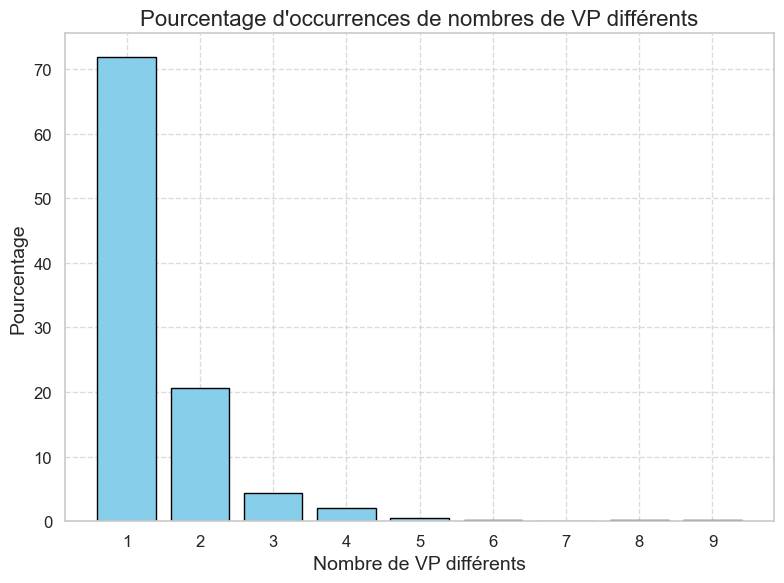

In [3]:
def analyse_differents_vp(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["Vp"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence

def analyse_mean_vp(df):
    Vpmean=0
    j=0
    for i in df["Vp"] : 
        j=j+1
        Vpmean=i+Vpmean
        
    return Vpmean/j

def analyse_mean_turn(df):
    turnmean=0
    j=0
    for i in df["numberOfTurn"] : 
        j=j+1
        turnmean=i+turnmean
        
    return turnmean/j

def analyse_differents_numberOfTurn(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["numberOfTurn"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence


def graph_NumberOfTurn(data_set):
   
    donnees=analyse_differents_numberOfTurn(data_set)
    tours = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(tours), 0.5)) 
    # Créer le graphique à barres
    plt.bar(tours, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de tours')
    plt.xlabel('Nombre de tours')
    plt.ylabel('Occurrences')
    plt.xticks(tours)
    plt.show()
    plt.clf()
    
def graph_Vp(donnees) :   
    
    
    vps = list(donnees.keys())
    print(vps)
    occurrences = list(donnees.values())
    
    # Créer le graphique à barres
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Ajouter des titres et des libellés
    plt.title('Occurrence de VP')
    plt.xlabel('VP')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()
    
def plot_dictionary(data):
    # Calcul de la somme totale des valeurs
    total = sum(data.values())
    
    # Calcul des pourcentages pour chaque valeur
    percentages = [val / total * 100 for val in data.values()]
    
    # Séparation des clés et des pourcentages calculés
    x = list(data.keys())
    y = percentages

    # Création du graphique
    plt.figure(figsize=(8, 6))  # Définit la taille du graphique
    plt.bar(x, y, color='skyblue', edgecolor='black')  # Couleur des barres et des bordures
    
    # Ajout de titre et d'étiquettes
    plt.title('Pourcentage d\'occurrences de nombres de VP différents', fontsize=16)
    plt.xlabel('Nombre de VP différents', fontsize=14)
    plt.ylabel('Pourcentage', fontsize=14)

    # Ajustement des étiquettes de l'axe x
    plt.xticks(x, fontsize=12)  
    
    # Ajustement des étiquettes de l'axe y
    plt.yticks(fontsize=12)

    # Affichage du graphique
    plt.grid(True, linestyle='--', alpha=0.7)  # Ajout d'une grille en pointillés
    plt.tight_layout()  # Ajustement automatique des marges
    plt.show()

analyse_differents_vp("csv_iteration_2\same_ug_new_agents_csv_1\debate_2-10_data.csv")
dic={}
for j in range(1,10):
    for i in range(1,120):
        test = len(analyse_differents_vp(f"csv_iteration_{j}\same_ug_new_agents_csv_1\debate_{j}-{i}_data.csv"))
        if(test in dic.keys()):
            dic[test]= dic[test]+1
        else :
            dic[test]=1
plot_dictionary(dic)
    



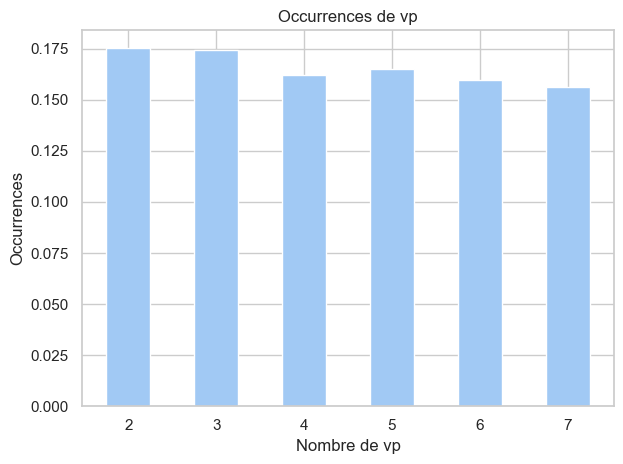

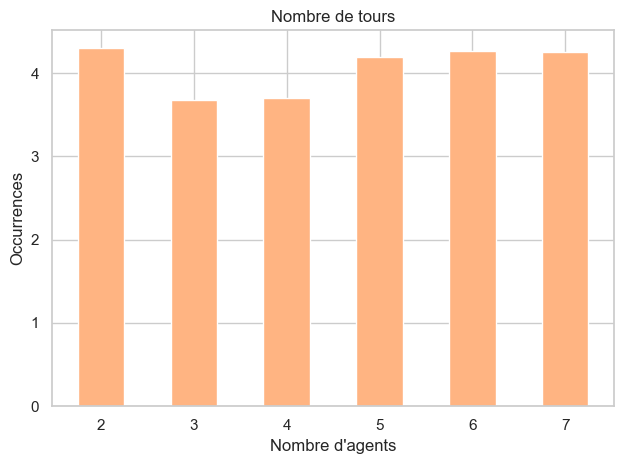

<Figure size 640x480 with 0 Axes>

In [9]:

import os

import seaborn as sns
def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df


def all_graph_stat_vp(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def all_graph_stat_turn(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    

# Utiliser Seaborn pour des graphiques plus esthétiques
sns.set(style="whitegrid")

def affichage_graph_vp(donnees):
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5))
    
    # Choisir une couleur plus agréable
    couleur = sns.color_palette("pastel")[0]
    
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color=couleur, width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('vp moyen')
    plt.xlabel('Nombre d\'agents')
    plt.ylabel('Occurrences')
    plt.xticks(vp)  # Étiquettes sans rotation
    plt.tight_layout()  # Pour une meilleure gestion des espaces
    plt.show()
    plt.clf()

def affichage_graph_turn(donnees):
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5))
    
    # Choisir une couleur plus agréable
    couleur = sns.color_palette("pastel")[1]
    
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color=couleur, width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Nombre de tours moyen')
    plt.xlabel('Nombre d\'agents')
    plt.ylabel('Occurrences')
    plt.xticks(vp)  # Étiquettes sans rotation
    plt.tight_layout()  # Pour une meilleure gestion des espaces
    plt.show()
    plt.clf()
    

path="csv_iteration_3/same_ug_new_agents_csv_1"
liste_of_df=create_csv_link(path)   
affichage_graph_vp(all_graph_stat_vp(liste_of_df))
affichage_graph_turn(all_graph_stat_turn(liste_of_df))


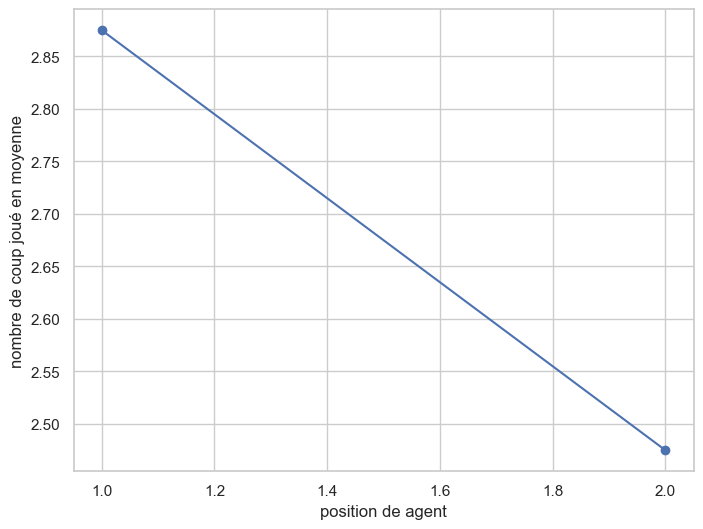

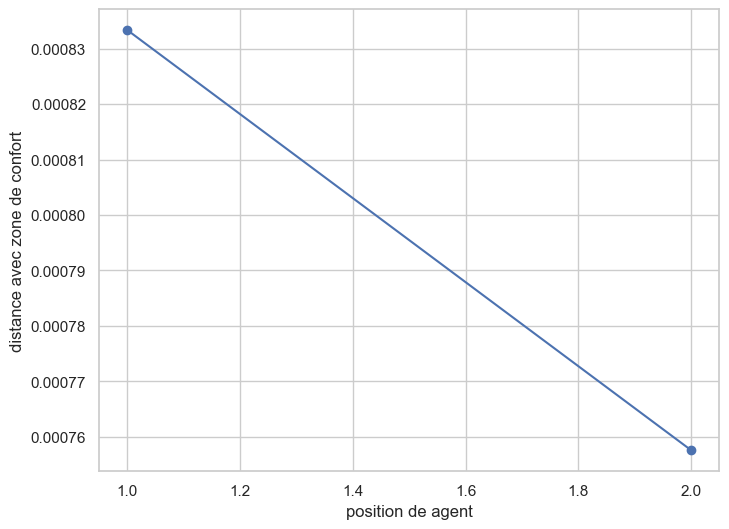

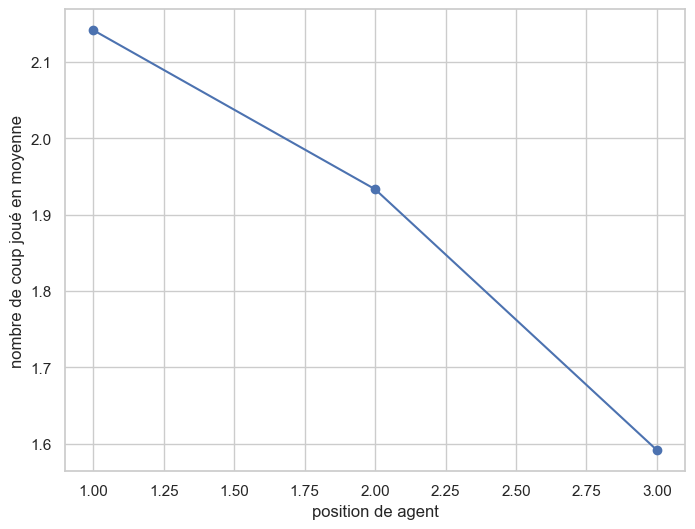

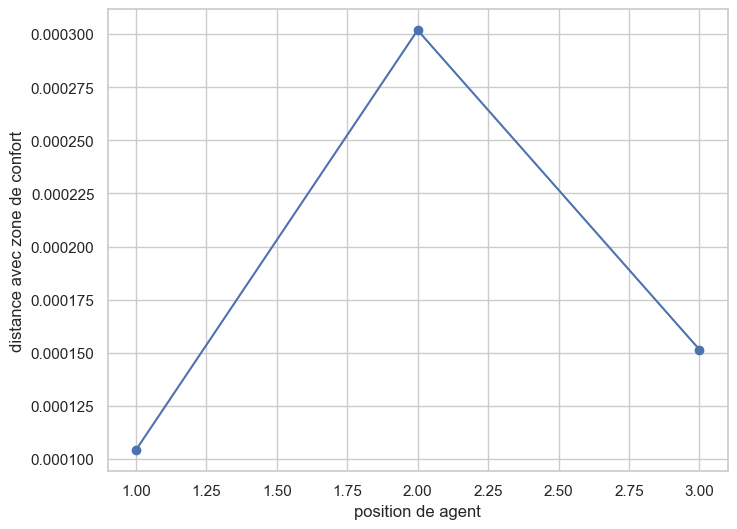

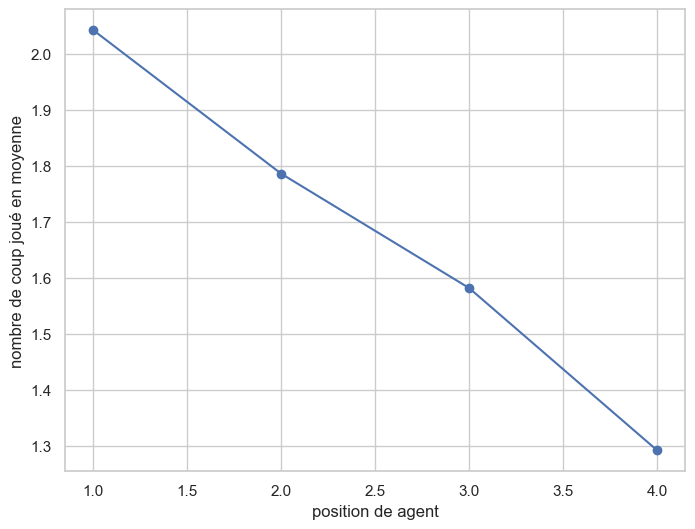

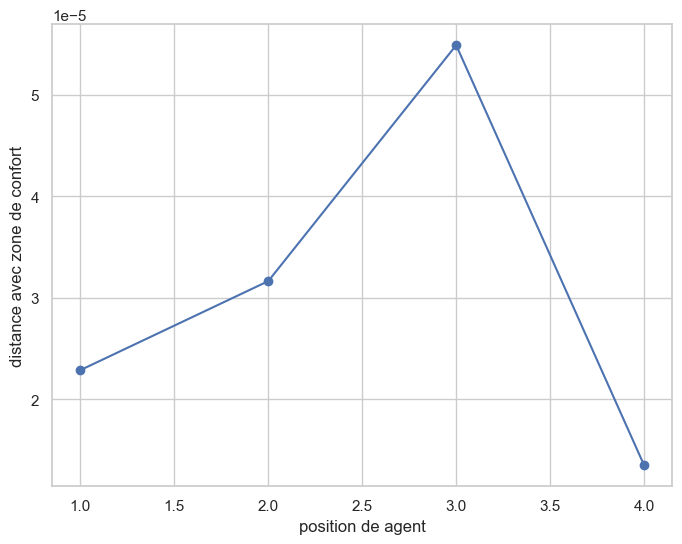

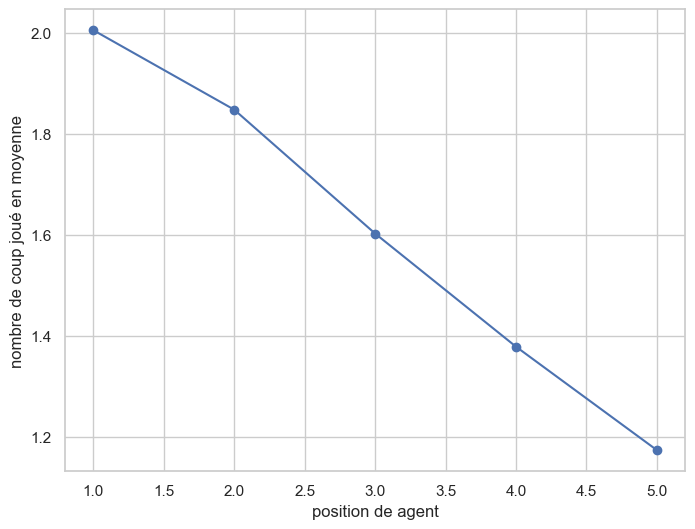

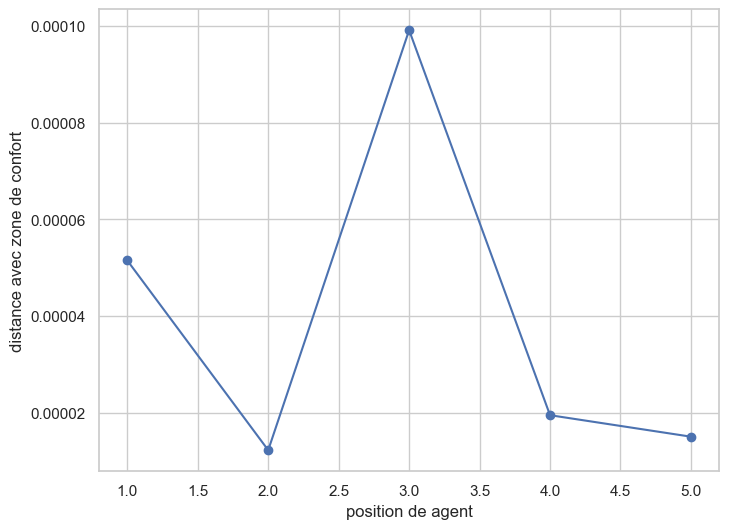

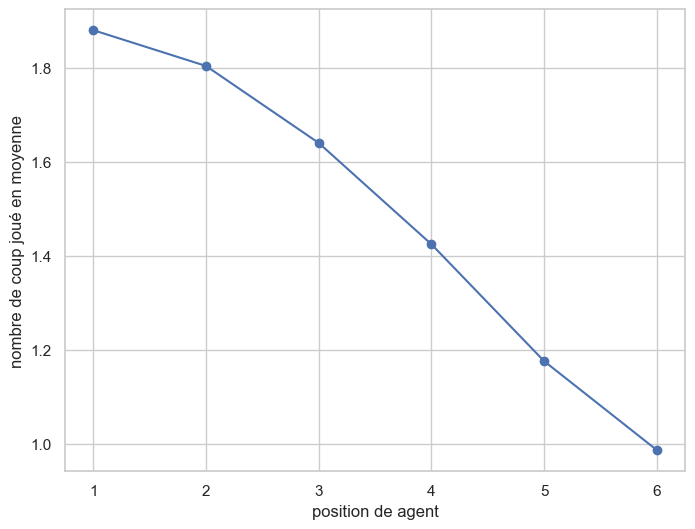

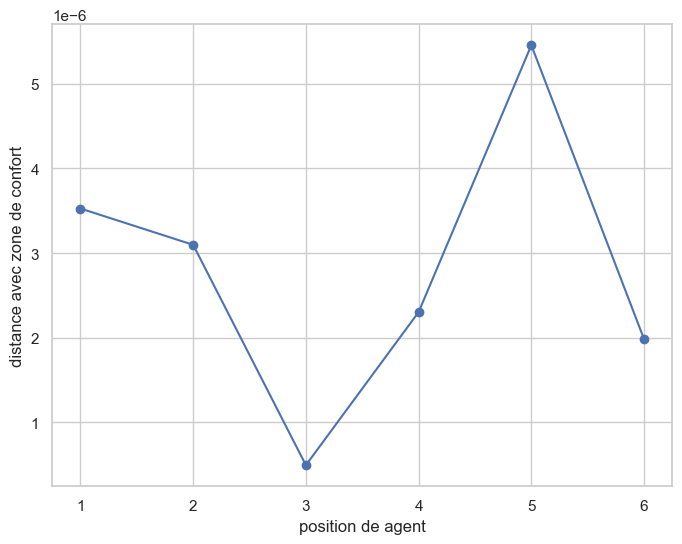

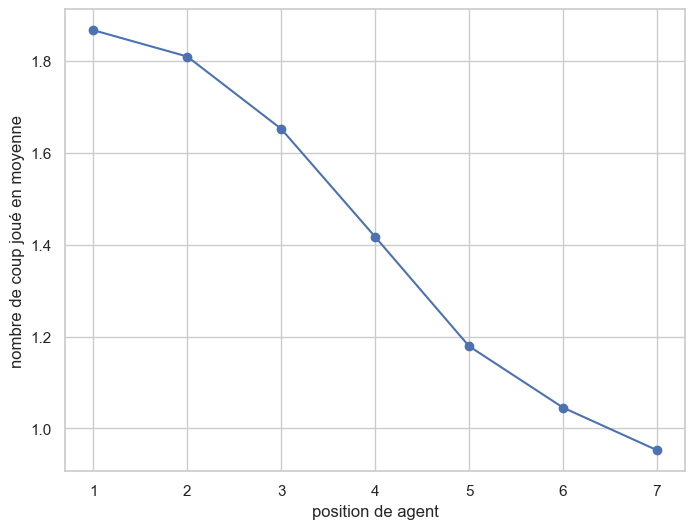

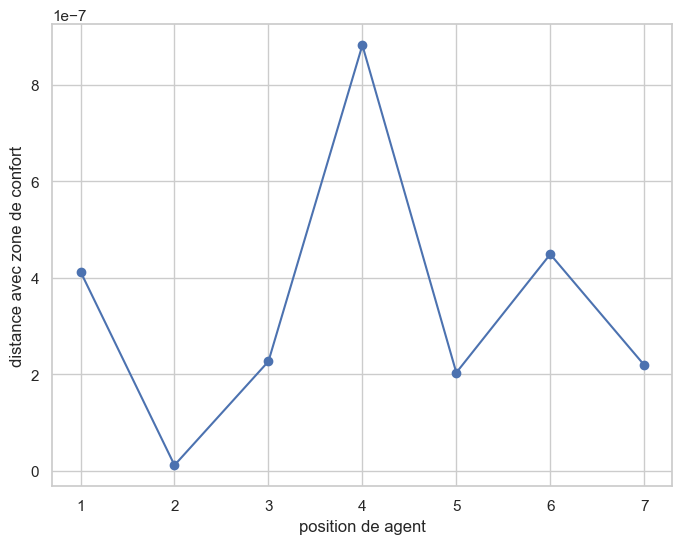

{1: 2.875, 2: 2.475}
{1: 2.1416666666666666, 2: 1.9333333333333333, 3: 1.5916666666666666}
{1: 2.0416666666666665, 2: 1.7854166666666667, 3: 1.58125, 4: 1.2916666666666667}
{1: 2.005, 2: 1.8475, 3: 1.6020833333333333, 4: 1.3779166666666667, 5: 1.1729166666666666}
{1: 1.8805555555555555, 2: 1.804375, 3: 1.640486111111111, 4: 1.4247916666666667, 5: 1.1760416666666667, 6: 0.9867361111111111}
{1: 1.86734126984127, 2: 1.8099801587301587, 3: 1.6523710317460318, 4: 1.4173214285714286, 5: 1.1790476190476191, 6: 1.0453174603174604, 7: 0.952609126984127}


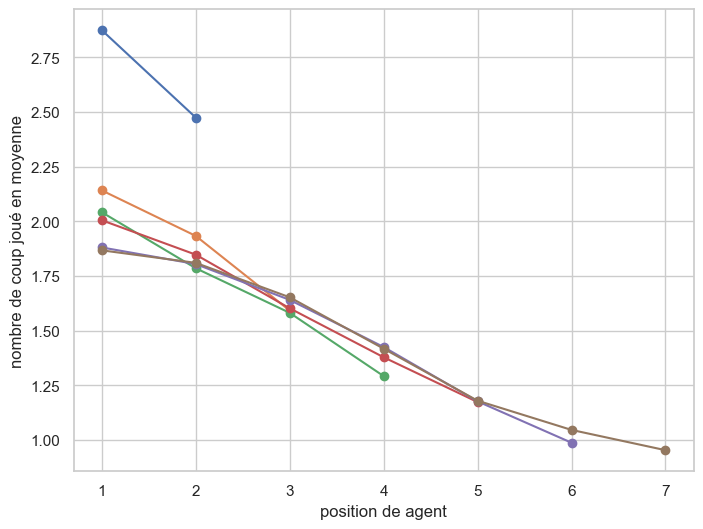

{1: 0.0008333333333333338, 2: 0.0007575757575757576}
{1: 0.00010416666666666699, 2: 0.0003018372703412072, 3: 0.00015151515151515157}
{1: 2.2893772893772928e-05, 2: 3.166160081053693e-05, 3: 5.490060101710582e-05, 4: 1.3528138528138533e-05}
{1: 5.148005148005147e-05, 2: 1.225783305429323e-05, 3: 9.90990990990991e-05, 4: 1.9490644490644492e-05, 5: 1.5046559164206218e-05}
{1: 3.527336860670193e-06, 2: 3.0984011962272826e-06, 3: 4.960317460317462e-07, 4: 2.304147465437787e-06, 5: 5.456349206349206e-06, 6: 1.984126984126985e-06}
{1: 4.1260133003252277e-07, 2: 1.1863240562792148e-08, 3: 2.2683689175009528e-07, 4: 8.818342151675484e-07, 5: 2.035002035002036e-07, 6: 4.48790627362056e-07, 7: 2.1931628149244756e-07}


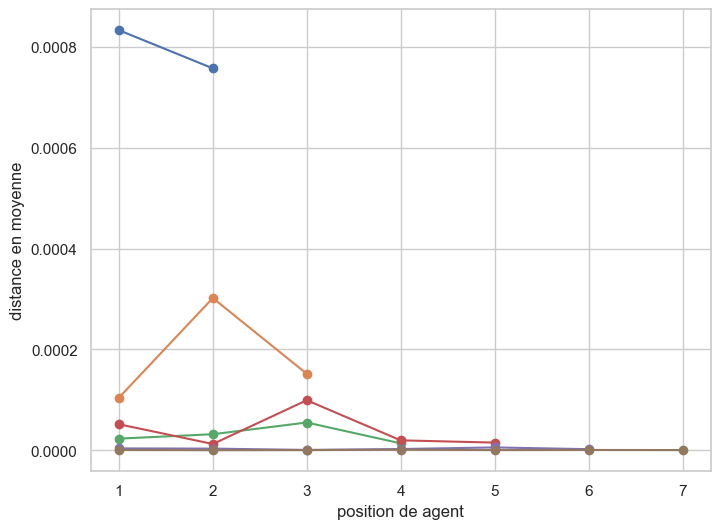

In [5]:

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn
def number_argument_play_zone_de_confort(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=abs(float(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[4].split("]")[0]))+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn
def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
    
def afficher_graphique2(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('distance avec zone de confort')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
    
def afficher_graphique_all_graph(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(2,8):
        dictionnaire = number_argument_play(createAgentNumber(i,liste_of_df),i)
        print(dictionnaire)
        cles = list(dictionnaire.keys())
        valeurs = list(dictionnaire.values())
        
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
    
def afficher_graphique_all_graph2(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(2,8):
        dictionnaire = number_argument_play_zone_de_confort(createAgentNumber(i,liste_of_df),i)
        print(dictionnaire)
        cles = list(dictionnaire.keys())
        valeurs = list(dictionnaire.values())
        
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('distance en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
  
def createAgentNumber(number,liste_of_df):
    test=[] 
    for i in liste_of_df:
        if len(i["order"][0].split(","))==number:
            test.append(i)
    return test

for i in range(2,8):
    afficher_graphique(number_argument_play(createAgentNumber(i,liste_of_df),i))
    afficher_graphique2(number_argument_play_zone_de_confort(createAgentNumber(i,liste_of_df),i))
    
    
afficher_graphique_all_graph(liste_of_df)
afficher_graphique_all_graph2(liste_of_df)
        

 0.01353383458646612]
 -0.007894736842105288]
 -0.012967200610221219]
 -0.04407359863072316]
 0.12781954887218042]
 -0.03789473684210529]
 -0.04484629294755879]
 -0.03317972350230414]
 0.01607142857142857]
 -0.009266409266409259]
 0.10634920634920636]
 0.010389610389610393]
 0.11428571428571427]
 0.11138014527845036]
 0.004926108374384258]
 0.0]
 0.026634382566585957]
 0.010989010989010978]
 -0.012987012987012964]
 -0.03156938451056095]
 0.026634382566585985]
 0.03510895883777243]
 0.023809523809523808]
 -0.02521008403361344]
 -0.0056022408963585235]
 0.04633204633204635]
 -0.03647416413373859]
 0.10185185185185186]
 0.03367003367003368]
 0.18518518518518517]
 -0.038487573735615496]
 0.02832244008714596]
 0.026270456503014655]
 -0.015739573116622274]
 0.020833333333333343]
 -0.039278131634819496]
 0.23333333333333336]
 -0.023809523809523808]
 -0.010416666666666657]
 -0.008771929824561403]
 0.0]
 0.2208955223880597]
 0.08756218905472635]
 -0.02525832376578646]
 -0.02802534092129283]
 0.

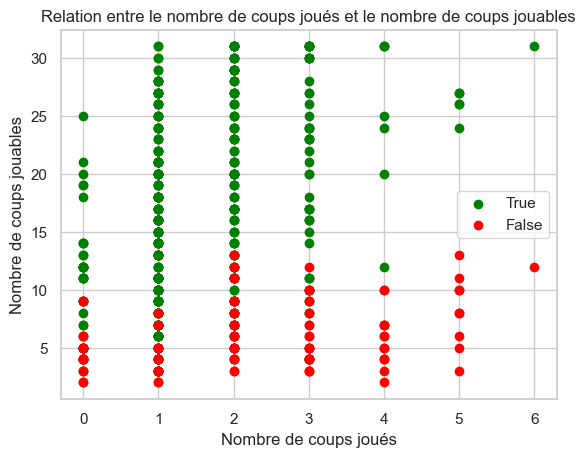

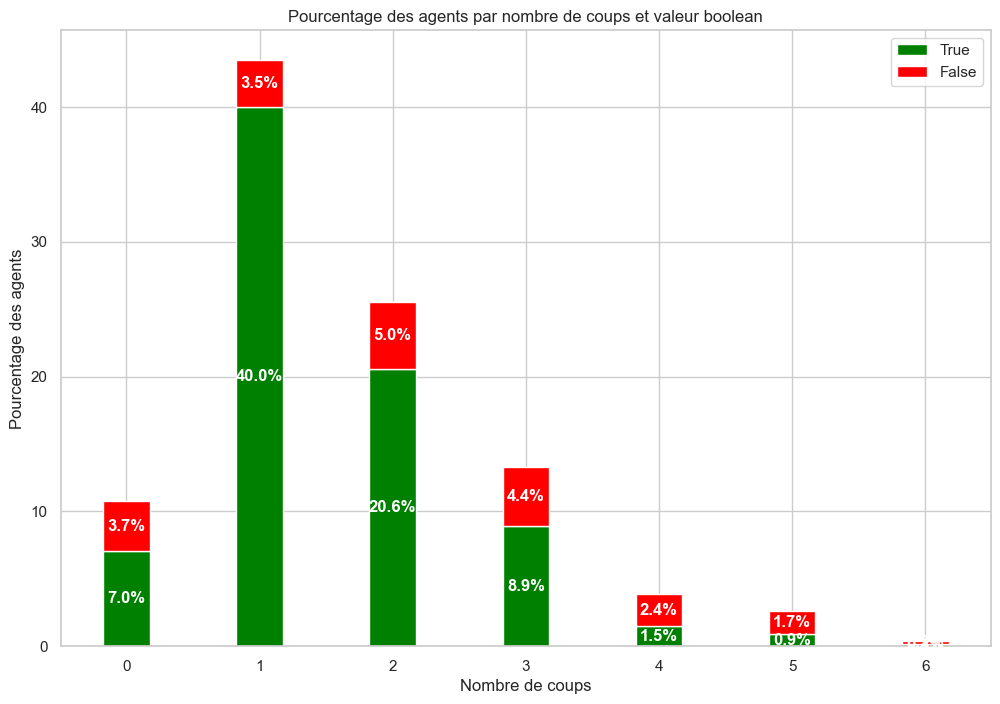

In [6]:
import numpy as np
def number_argument_play_all_point(dfs):
    
    dpn = []
    
    
    for df in dfs : 
            for i in range(len(df["order"][0].split(","))) :
                print(df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[4])
                boolean=df[f"{i}"][0].split(",")[1].strip()
                nb_coup_play=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[1]
                nb_coup_possible=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[3]
                distance=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[4]
                dpn.append([boolean,nb_coup_play,nb_coup_possible,distance])
    
   
    
    return dpn
def plot_agents_bar_chart(data):
    # Création d'un dictionnaire pour stocker le nombre d'agents par nombre de coups et valeur boolean
    agent_counts = {}

    for item in data:
        # Récupération du nombre de coups et de la valeur boolean
        coup = int(item[1].strip())
        boolean = item[0]

        # Mise à jour du dictionnaire
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Calcul du nombre total d'agents
    total_agents = sum(sum(counts.values()) for counts in agent_counts.values())

    # Préparation des données pour le graphique
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Calcul des pourcentages par rapport au nombre total d'agents
    true_percentages = [count / total_agents * 100 for count in true_counts]
    false_percentages = [count / total_agents * 100 for count in false_counts]

    # Création du diagramme en barres
    width = 0.35  # Largeur des barres
    fig, ax = plt.subplots(figsize=(12, 8))
    ind = np.arange(len(coups))  # Emplacement des barres

    p1 = ax.bar(ind, true_percentages, width, color='green', label='True')
    p2 = ax.bar(ind, false_percentages, width, color='red', bottom=true_percentages, label='False')

    ax.set_xlabel('Nombre de coups')
    ax.set_ylabel('Pourcentage des agents')
    ax.set_title('Pourcentage des agents par nombre de coups et valeur boolean')
    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    # Ajouter des annotations pour les pourcentages sur les barres
    for i in range(len(ind)):
        ax.text(ind[i], true_percentages[i] / 2, f'{true_percentages[i]:.1f}%', ha='center', va='center', color='white', fontweight='bold')
        ax.text(ind[i], true_percentages[i] + false_percentages[i] / 2, f'{false_percentages[i]:.1f}%', ha='center', va='center', color='white', fontweight='bold')

    plt.show()
data=number_argument_play_all_point(liste_of_df)
print(data)


# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]
print(cleaned_data)
# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups joués')
plt.ylabel('Nombre de coups jouables')

# Afficher le graphique
plt.title('Relation entre le nombre de coups joués et le nombre de coups jouables')
plt.show()

plot_agents_bar_chart(data)


if not os.path.exists("csv/csv_UG_point"):
        os.mkdir("csv/csv_UG_point")
# Chemin vers le fichier texte où vous souhaitez enregistrer les données
file_path = "csv/csv_UG_point/"+path.split("/")[0]+".txt"

# Écriture des données dans le fichier texte
with open(file_path, "w") as file:
    for item in data:
        file.write(' '.join(item) + "\n")

[['True', '11', '0.01353383458646612'], ['True', '15', '-0.007894736842105288'], ['True', '17', '-0.012967200610221219'], ['True', '29', '-0.04407359863072316'], ['False', '5', '0.12781954887218042'], ['True', '15', '-0.03789473684210529'], ['True', '16', '-0.04484629294755879'], ['True', '22', '-0.03317972350230414'], ['True', '11', '0.01607142857142857'], ['True', '14', '-0.009266409266409259'], ['False', '6', '0.10634920634920636'], ['True', '9', '0.010389610389610393'], ['False', '5', '0.11428571428571427'], ['False', '10', '0.11138014527845036'], ['True', '19', '0.004926108374384258'], ['True', '28', '0.0'], ['True', '18', '0.026634382566585957'], ['True', '12', '0.010989010989010978'], ['True', '18', '-0.012987012987012964'], ['True', '29', '-0.03156938451056095'], ['True', '18', '0.026634382566585985'], ['True', '13', '0.03510895883777243'], ['True', '11', '0.023809523809523808'], ['True', '21', '-0.02521008403361344'], ['True', '28', '-0.0056022408963585235'], ['True', '11', '0

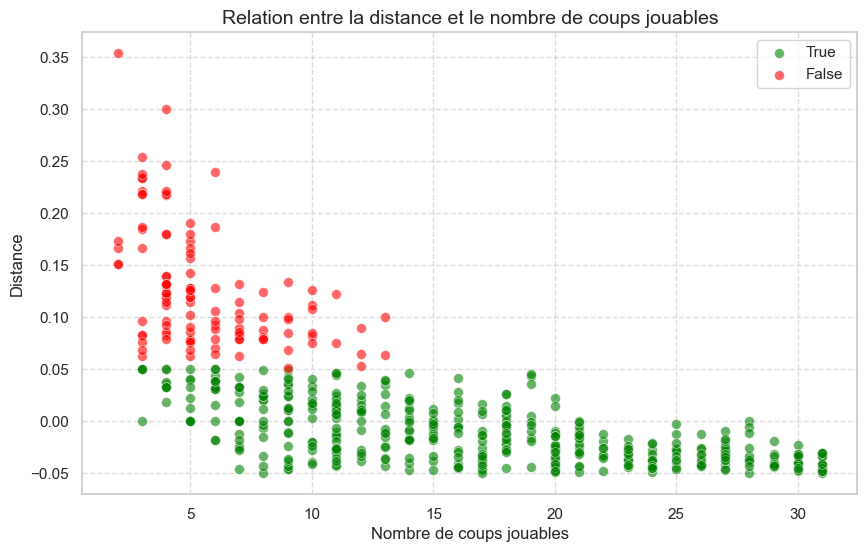

         vp      tour  nbCoup/byTurnW2  nbCoup/byTurnW3  nbCoup/byTurnW4  \
6  0.159771  4.265833              NaN              NaN              NaN   
7  0.156485  4.252460              NaN              NaN              NaN   
2  0.175261  4.300000            2.475         1.933333         1.785417   
3  0.174245  3.683333              NaN         1.591667         1.581250   
4  0.162119  3.704167              NaN              NaN         1.291667   
5  0.165283  4.195833              NaN              NaN              NaN   
1       NaN       NaN            2.875         2.141667         2.041667   

   nbCoup/byTurnW5  nbCoup/byTurnW6  nbCoup/byTurnW7  Distance/byTurnW2  \
6              NaN         0.986736         1.045317                NaN   
7              NaN              NaN         0.952609                NaN   
2         1.847500         1.804375         1.809980           0.000758   
3         1.602083         1.640486         1.652371                NaN   
4         1.3779

In [7]:



import pandas as pd
# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[2].strip(), d[3].strip().split("]")[0]] for d in data]
print(cleaned_data)

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(true_x, true_y, color='green', label='True', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.scatter(false_x, false_y, color='red', label='False', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups jouables', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Afficher le graphique
plt.title('Relation entre la distance et le nombre de coups jouables', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Définir les dictionnaires
dictionnaire1 = all_graph_stat_vp(liste_of_df)
dictionnaire2 = all_graph_stat_turn(liste_of_df)

# Créer un DataFrame initial avec les dictionnaires
df = pd.DataFrame({'vp': dictionnaire1, 'tour': dictionnaire2})

# Boucle pour ajouter d'autres dictionnaires au DataFrame
for i in range(2, 8):
    temp_dic = number_argument_play(createAgentNumber(i, liste_of_df), i)
    nouveau_df = pd.DataFrame(temp_dic, index=[f"nbCoup/byTurnW{i}"]).T
    df = pd.concat([df, nouveau_df], axis=1)
    
for i in range(2, 8):   
    temp_dic = number_argument_play_zone_de_confort(createAgentNumber(i, liste_of_df), i)
    nouveau_df = pd.DataFrame(temp_dic, index=[f"Distance/byTurnW{i}"]).T
    df = pd.concat([df, nouveau_df], axis=1)

# Afficher le DataFrame
print(df)

print(df["nbCoup/byTurnW2"])
# Exporter le DataFrame au format CSV
pt=path.split("/")[0]
if not os.path.exists("csv/csv_UG"):
        os.mkdir("csv/csv_UG")
df.to_csv(f"csv/csv_UG/{pt}.csv")

In [8]:
import os
import shutil

def get_all_public_graphs(path):
    files_to_load = []

    for filename in os.listdir(path):
        if filename.startswith("A"): # It means it's a public graph file.
            files_to_load.append(os.path.join(path, filename))
    return files_to_load

def get_public_graph_attacks(filepath):
    attacks = []

    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("att"): # We only want to compare attacks
                # strip newline characters and add it to the attacks list
                attacks.append(line.strip())
    return attacks

def compare_public_graphs(path):
    files = get_all_public_graphs(path)
    attack_groups = {}

    for file in files:
        attacks = get_public_graph_attacks(file)
        # Convert the list of attacks into a tuple
        attack_tuple = tuple(attacks)

        # Check if the attack tuple already exists in the dictionary (as key)
        if attack_tuple in attack_groups:
            attack_groups[attack_tuple].append(file)
        else:
            # If it doesn't, create a new group with the attack tuple as key and file as value
            attack_groups[attack_tuple] = [file]
    return attack_groups

def cluster_public_graphs(directory_path):
    # Compare files to find identical attacks
    result = compare_public_graphs(directory_path)

    # Create a folder for each attack cluster
    for i, (attacks, files) in enumerate(result.items()):
        cluster_folder = os.path.join(directory_path, f"Cluster_{i+1}")
        os.makedirs(cluster_folder, exist_ok=True)
        # Move files from the cluster to the corresponding folder
        for file in files:
            shutil.move(file, cluster_folder)
            
folder_path = "replays/"
file_names = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]
for file_path in file_paths:
    cluster_public_graphs(file_path)